In [44]:
import pandas as pd

url = r"C:/Users/Carlos/Documents/BootCamp/Data Analyst/Week2/MiniProject02/GSAF5.csv.xlsx"

df = pd.read_excel(url)

df.columns = df.columns.str.strip()

selected_columns = ['Species', 'State', 'Location', 'Date']
df_reduced = df[selected_columns].copy()

df['State'] = df['State'].str.lower().str.replace(' ', '')

df_reduced.loc[:, 'Year'] = pd.to_datetime(df_reduced['Date'], errors='coerce').dt.year
df_reduced = df_reduced[(df_reduced['Year'] >= 1990) & (df_reduced['Year'] <= 2024)]

duplicates_count = df['State'].duplicated().sum()
print(f"There are {duplicates_count} duplicates in the 'State' column after transformation.")

unique_state_counts = df_reduced['State'].value_counts()

top_five_states = unique_state_counts.head(5)

print("Top 5 most frequently appearing states:")
print(top_five_states)

There are 6100 duplicates in the 'State' column after transformation.
Top 5 most frequently appearing states:
State
Florida              820
Hawaii               213
New South Wales      204
California           177
Western Australia    139
Name: count, dtype: int64


In [78]:
import pandas as pd

url = r"C:/Users/Carlos/Documents/BootCamp/Data Analyst/Week2/MiniProject02/GSAF5.csv.xlsx"

df = pd.read_excel(url)

df.columns = df.columns.str.strip()

df['State'] = df['State'].str.lower().str.replace(' ', '')

selected_columns = ['Species', 'State', 'Location', 'Date']
df_reduced = df[selected_columns].copy()

df_reduced.loc[:, 'Year'] = pd.to_datetime(df_reduced['Date'], errors='coerce').dt.year
df_reduced = df_reduced[(df_reduced['Year'] >= 1990) & (df_reduced['Year'] <= 2024)]

unique_state_counts = df_reduced['State'].value_counts()

top_five_states = unique_state_counts.head(5).index

print("Top 5 most frequently appearing states:")
print(top_five_states)

df_filtered_reduced = df_reduced[df_reduced['State'].isin(top_five_states)]

print(f"Number of rows in the filtered DataFrame: {df_filtered_reduced.shape[0]}")
display(df_filtered_reduced.head())

Top 5 most frequently appearing states:
Index(['florida', 'hawaii', 'newsouthwales', 'california', 'westernaustralia'], dtype='object', name='State')
Number of rows in the filtered DataFrame: 1556


,Species,State,Location,Date,Year
3,Bull or tiger 7-8ft,florida,"Bathtub Beach, Martin County",2024-10-25 00:00:00,2024.0
5,Bull shark 6ft,florida,Brevard County Orlando,2024-10-11 00:00:00,2024.0
11,Undetermined small shall shark,westernaustralia,Trigg beach Sterling,2024-07-18 00:00:00,2024.0
12,4-5ft Blacktip shark,florida,Ponce de Leon Inlet Volusia County,2024-07-08 00:00:00,2024.0
13,Not specified,florida,New Smyrna Beach,2024-07-05 00:00:00,2024.0


In [133]:
import pandas as pd

url = r"C:/Users/Carlos/Documents/BootCamp/Data Analyst/Week2/MiniProject02/GSAF5.csv.xlsx"

df = pd.read_excel(url)

df.columns = df.columns.str.strip()

df['State'] = df['State'].str.lower().str.replace(' ', '')

selected_columns = ['Species', 'State', 'Location']
df_reduced = df[selected_columns]

unique_state_counts = df_reduced['State'].value_counts()

top_five_states = unique_state_counts.head(5).index

print("Top 5 most frequently appearing states:")
print(top_five_states)

df_filtered_reduced = df_reduced[df_reduced['State'].isin(top_five_states)]

print(f"Number of rows in the filtered DataFrame: {df_filtered_reduced.shape[0]}")
display(df_filtered_reduced.head())

df_filtered_reduced.loc[:, 'Species'] = df_filtered_reduced['Species'].str.lower().fillna('')

species_keywords = [
    "bull", "white", "hammerhead", "grey reef", "tiger", "zambesi", "spinner", 
    "nurse", "mako", "lemon", "shark", "bronze whaler", "leopard", "wobbegong"
]

species_counts = {}

for keyword in species_keywords:
    count = df_filtered_reduced['Species'].str.contains(keyword).sum()
    species_counts[keyword] = count

blank_count = df_filtered_reduced['Species'].eq('').sum()
species_counts["blank"] = blank_count

sorted_species_counts = sorted(species_counts.items(), key=lambda item: item[1], reverse=True)

print("Counts for each species keyword (sorted):")
for species, count in sorted_species_counts:
    if species == "blank":
        species_label = "No specified"
    elif species == "shark":
        species_label = "Specified with at least the mention Shark"
    else:
        species_label = species.capitalize()
    
    print(f"{species_label}: {count}")

Top 5 most frequently appearing states:
Index(['florida', 'newsouthwales', 'queensland', 'hawaii', 'california'], dtype='object', name='State')
Number of rows in the filtered DataFrame: 2724


,Species,State,Location
2,Reported as a large Tiger shark,queensland,Whitsunday Islands
3,Bull or tiger 7-8ft,florida,"Bathtub Beach, Martin County"
5,Bull shark 6ft,florida,Brevard County Orlando
12,4-5ft Blacktip shark,florida,Ponce de Leon Inlet Volusia County
13,Not specified,florida,New Smyrna Beach


Counts for each species keyword (sorted):
Specified with at least the mention Shark: 1512
No specified: 1113
White: 247
Tiger: 159
Bull: 96
Nurse: 75
Spinner: 51
Wobbegong: 38
Hammerhead: 37
Bronze whaler: 36
Lemon: 21
Mako: 16
Grey reef: 4
Leopard: 2
Zambesi: 0


In [131]:
import pandas as pd

url = r"C:/Users/Carlos/Documents/BootCamp/Data Analyst/Week2/MiniProject02/GSAF5.csv.xlsx"

df = pd.read_excel(url)

df.columns = df.columns.str.strip()

df['State'] = df['State'].str.lower().str.replace(' ', '')

selected_columns = ['Species', 'State', 'Location', 'Date', 'Fatal Y/N']
df_reduced = df[selected_columns].copy()

df_reduced.loc[:, 'Year'] = pd.to_datetime(df_reduced['Date'], errors='coerce').dt.year

df_reduced = df_reduced[(df_reduced['Year'] >= 1990) & (df_reduced['Year'] <= 2024)]

unique_state_counts = df_reduced['State'].value_counts()

top_five_states = unique_state_counts.head(5).index

print("Top 5 most frequently appearing states:")
print(top_five_states)

df_filtered_reduced = df_reduced[df_reduced['State'].isin(top_five_states)]

print(f"Number of rows in the filtered DataFrame: {df_filtered_reduced.shape[0]}")
display(df_filtered_reduced.head())

df_filtered_reduced.loc[:, 'Species'] = df_filtered_reduced['Species'].str.lower().fillna('')

species_keywords = [
    "bull", "white", "hammerhead", "grey reef", "tiger", "zambesi", "spinner", 
    "nurse", "mako", "lemon", "shark", "bronze whaler", "leopard", "wobbegong"
]

species_counts = {}
species_fatal_counts = {}

for keyword in species_keywords:
    count = df_filtered_reduced['Species'].str.contains(keyword).sum()
    species_counts[keyword] = count
    
    fatal_counts = df_filtered_reduced[df_filtered_reduced['Species'].str.contains(keyword, na=False)]['Fatal Y/N'].value_counts(dropna=False)
    species_fatal_counts[keyword] = {
        'Y': fatal_counts.get('Y', 0),
        'N': fatal_counts.get('N', 0)
    }

blank_count = df_filtered_reduced['Species'].eq('').sum()
species_counts["blank"] = blank_count
fatal_counts = df_filtered_reduced[df_filtered_reduced['Species'].eq('')]['Fatal Y/N'].value_counts(dropna=False)
species_fatal_counts["blank"] = {
    'Y': fatal_counts.get('Y', 0),
    'N': fatal_counts.get('N', 0)
}

sorted_species_counts = sorted(species_counts.items(), key=lambda item: item[1], reverse=True)

print("Counts for each species keyword:")
for species, count in sorted_species_counts:
    if species == "blank":
        species_label = "No specified"
    elif species == "shark":
        species_label = "Specified with at least the mention Shark"
    else:
        species_label = species.capitalize()
    
    print(f"{species_label}: {count}")

Top 5 most frequently appearing states:
Index(['florida', 'hawaii', 'newsouthwales', 'california', 'westernaustralia'], dtype='object', name='State')
Number of rows in the filtered DataFrame: 1556


,Species,State,Location,Date,Fatal Y/N,Year
3,Bull or tiger 7-8ft,florida,"Bathtub Beach, Martin County",2024-10-25 00:00:00,N,2024.0
5,Bull shark 6ft,florida,Brevard County Orlando,2024-10-11 00:00:00,N,2024.0
11,Undetermined small shall shark,westernaustralia,Trigg beach Sterling,2024-07-18 00:00:00,N,2024.0
12,4-5ft Blacktip shark,florida,Ponce de Leon Inlet Volusia County,2024-07-08 00:00:00,N,2024.0
13,Not specified,florida,New Smyrna Beach,2024-07-05 00:00:00,N,2024.0


Counts for each species keyword:
Specified with at least the mention Shark: 948
No specified: 566
White: 191
Tiger: 111
Bull: 66
Spinner: 45
Nurse: 32
Bronze whaler: 25
Wobbegong: 24
Lemon: 15
Hammerhead: 9
Mako: 7
Grey reef: 1
Zambesi: 0
Leopard: 0


In [123]:
import pandas as pd

url = r"C:/Users/Carlos/Documents/BootCamp/Data Analyst/Week2/MiniProject02/GSAF5.csv.xlsx"
df = pd.read_excel(url)

df.columns = df.columns.str.strip()
df['State'] = df['State'].str.lower().str.replace(' ', '')

selected_columns = ['Species', 'State', 'Location', 'Date', 'Fatal Y/N']
df_reduced = df[selected_columns].copy()

df_reduced.loc[:, 'Year'] = pd.to_datetime(df_reduced['Date'], errors='coerce').dt.year
df_reduced = df_reduced[(df_reduced['Year'] >= 1990) & (df_reduced['Year'] <= 2024)]

unique_state_counts = df_reduced['State'].value_counts()
top_five_states = unique_state_counts.head(5).index

print("Top 5 most frequently appearing states:")
print(top_five_states)

df_filtered_reduced = df_reduced[df_reduced['State'].isin(top_five_states)]

print(f"Number of rows in the filtered DataFrame: {df_filtered_reduced.shape[0]}")
print(df_filtered_reduced.head())

df_filtered_reduced.loc[:, 'Species'] = df_filtered_reduced['Species'].str.lower().fillna('')

species_keywords = ["bull", "white", "hammerhead", "grey reef", "tiger", "zambesi", "spinner", "nurse", "mako", "lemon", "shark", "bronze whaler", "leopard", "wobbegong"]

species_counts = {}
species_fatal_counts = {}

for keyword in species_keywords:
    species_df = df_filtered_reduced[df_filtered_reduced['Species'].str.contains(keyword)]
    
    fatal_counts = species_df['Fatal Y/N'].value_counts(dropna=False)
    
    species_counts[keyword] = len(species_df)
    species_fatal_counts[keyword] = {
        'Y': fatal_counts.get('Y', 0),
        'N': fatal_counts.get('N', 0)
    }

blank_count = df_filtered_reduced['Species'].eq('').sum()
species_counts["blank"] = blank_count
fatal_counts = df_filtered_reduced[df_filtered_reduced['Species'].eq('')]['Fatal Y/N'].value_counts(dropna=False)
species_fatal_counts["blank"] = {
    'Y': fatal_counts.get('Y', 0),
    'N': fatal_counts.get('N', 0)
}

sorted_species_counts = sorted(species_counts.items(), key=lambda item: item[1], reverse=True)

print("Counts for each species keyword:")
for species, count in sorted_species_counts:
    if species == "blank":
        species_label = "No specified"
    elif species == "shark":
        species_label = "Specified with at least the mention Shark"
    else:
        species_label = species.capitalize()
    
    print(f"{species_label}: {count}")

print("\nFatal counts for each species keyword:")
for species, _ in sorted_species_counts:
    counts = species_fatal_counts[species]
    y_count = counts['Y']
    n_count = counts['N']
    if species == "blank":
        species_label = "No specified"
    elif species == "shark":
        species_label = "Specified with at least the mention Shark"
    else:
        species_label = species.capitalize()
    
    print(f"{species_label} - Fatal (Y): {y_count}, Not Fatal (N): {n_count}")

Top 5 most frequently appearing states:
Index(['florida', 'hawaii', 'newsouthwales', 'california', 'westernaustralia'], dtype='object', name='State')
Number of rows in the filtered DataFrame: 1556
                           Species             State  \
3              Bull or tiger 7-8ft           florida   
5                   Bull shark 6ft           florida   
11  Undetermined small shall shark  westernaustralia   
12            4-5ft Blacktip shark           florida   
13                   Not specified           florida   

                              Location                 Date Fatal Y/N    Year  
3         Bathtub Beach, Martin County  2024-10-25 00:00:00         N  2024.0  
5               Brevard County Orlando  2024-10-11 00:00:00         N  2024.0  
11                Trigg beach Sterling  2024-07-18 00:00:00         N  2024.0  
12  Ponce de Leon Inlet Volusia County  2024-07-08 00:00:00         N  2024.0  
13                    New Smyrna Beach  2024-07-05 00:00:00       

In [135]:
import pandas as pd

url = r"C:/Users/Carlos/Documents/BootCamp/Data Analyst/Week2/MiniProject02/GSAF5.csv.xlsx"
df = pd.read_excel(url)

df.columns = df.columns.str.strip()
df['State'] = df['State'].str.lower().str.replace(' ', '')

selected_columns = ['Species', 'State', 'Location', 'Date', 'Fatal Y/N']
df_reduced = df[selected_columns].copy()

df_reduced.loc[:, 'Year'] = pd.to_datetime(df_reduced['Date'], errors='coerce').dt.year
df_reduced = df_reduced[(df_reduced['Year'] >= 1990) & (df_reduced['Year'] <= 2024)]

unique_state_counts = df_reduced['State'].value_counts()
top_five_states = unique_state_counts.head(5).index

print("Top 5 most frequently appearing states:")
print(top_five_states)

df_filtered_reduced = df_reduced[df_reduced['State'].isin(top_five_states)]

print(f"Number of rows in the filtered DataFrame: {df_filtered_reduced.shape[0]}")
print(df_filtered_reduced.head())

df_filtered_reduced.loc[:, 'Species'] = df_filtered_reduced['Species'].str.lower().fillna('')

species_keywords = [
    "bull", "white", "hammerhead", "grey reef", "tiger", "zambesi", "spinner", 
    "nurse", "mako", "lemon", "shark", "bronze whaler", "leopard", "wobbegong"
]

species_counts = {}
species_fatal_counts = {}

for keyword in species_keywords:
    species_df = df_filtered_reduced[df_filtered_reduced['Species'].str.contains(keyword, na=False)]
    
    fatal_counts = species_df['Fatal Y/N'].value_counts(dropna=False)
    
    species_counts[keyword] = len(species_df)
    species_fatal_counts[keyword] = {
        'Y': fatal_counts.get('Y', 0),
        'N': fatal_counts.get('N', 0)
    }

blank_count = df_filtered_reduced['Species'].eq('').sum()
species_counts["blank"] = blank_count
fatal_counts = df_filtered_reduced[df_filtered_reduced['Species'].eq('')]['Fatal Y/N'].value_counts(dropna=False)
species_fatal_counts["blank"] = {
    'Y': fatal_counts.get('Y', 0),
    'N': fatal_counts.get('N', 0)
}

sorted_species_counts = sorted(species_counts.items(), key=lambda item: item[1], reverse=True)

print("Counts and percentage of non-fatal incidents for each species keyword:")
for species, _ in sorted_species_counts:
    total = species_counts[species]
    if total > 0:
        counts = species_fatal_counts[species]
        n_count = counts['N']
        n_percentage = (n_count / total * 100) if total > 0 else 0
        if species == "blank":
            species_label = "No specified"
        elif species == "shark":
            species_label = "Specified with at least the mention Shark"
        else:
            species_label = species.capitalize()
        
        print(f"{species_label} - Total: {total}, Non-Fatal (N): {n_count}, Percentage of N: {n_percentage:.2f}%")

Top 5 most frequently appearing states:
Index(['florida', 'hawaii', 'newsouthwales', 'california', 'westernaustralia'], dtype='object', name='State')
Number of rows in the filtered DataFrame: 1556
                           Species             State  \
3              Bull or tiger 7-8ft           florida   
5                   Bull shark 6ft           florida   
11  Undetermined small shall shark  westernaustralia   
12            4-5ft Blacktip shark           florida   
13                   Not specified           florida   

                              Location                 Date Fatal Y/N    Year  
3         Bathtub Beach, Martin County  2024-10-25 00:00:00         N  2024.0  
5               Brevard County Orlando  2024-10-11 00:00:00         N  2024.0  
11                Trigg beach Sterling  2024-07-18 00:00:00         N  2024.0  
12  Ponce de Leon Inlet Volusia County  2024-07-08 00:00:00         N  2024.0  
13                    New Smyrna Beach  2024-07-05 00:00:00       

In [108]:
import pandas as pd

url = r"C:/Users/Carlos/Documents/BootCamp/Data Analyst/Week2/MiniProject02/GSAF5.csv.xlsx"
df = pd.read_excel(url)

df.columns = df.columns.str.strip()
df['State'] = df['State'].str.lower().str.replace(' ', '')

selected_columns = ['Species', 'State', 'Location', 'Date', 'Fatal Y/N']
df_reduced = df[selected_columns].copy()

df_reduced.loc[:, 'Year'] = pd.to_datetime(df_reduced['Date'], errors='coerce').dt.year
df_reduced = df_reduced[(df_reduced['Year'] >= 1990) & (df_reduced['Year'] <= 2024)]

unique_state_counts = df_reduced['State'].value_counts()
top_five_states = unique_state_counts.head(5).index

print("Top 5 most frequently appearing states:")
print(top_five_states)

df_filtered_reduced = df_reduced[df_reduced['State'].isin(top_five_states)]

print(f"Number of rows in the filtered DataFrame: {df_filtered_reduced.shape[0]}")
print(df_filtered_reduced.head())

df_filtered_reduced.loc[:, 'Species'] = df_filtered_reduced['Species'].str.lower().fillna('')

species_keywords = ["bull", "white", "hammerhead", "grey reef", "tiger", "zambesi", "spinner", "nurse", "mako", "lemon", "shark", "bronze whaler", "leopard", "wobbegong", " "]

species_counts = {}
species_fatal_counts = {}

florida_df = df_filtered_reduced[df_filtered_reduced['State'] == 'florida']

for keyword in species_keywords:
    species_df = florida_df[florida_df['Species'].str.contains(keyword)]
    
    fatal_counts = species_df['Fatal Y/N'].value_counts(dropna=False)
    
    species_counts[keyword] = len(species_df)
    species_fatal_counts[keyword] = {
        'Y': fatal_counts.get('Y', 0),
        'N': fatal_counts.get('N', 0)
    }

sorted_species_counts = sorted(species_counts.items(), key=lambda item: item[1], reverse=True)

print("Counts and percentage of non-fatal incidents for each species keyword in Florida:")
for species, _ in sorted_species_counts:
    total = species_counts[species]
    if total > 0:
        counts = species_fatal_counts[species]
        n_count = counts['N']
        n_percentage = (n_count / total * 100) if total > 0 else 0
        if species == " ":
            species_label = "No specified"
        elif species == "shark":
            species_label = "Specified with at least the mention Shark"
        else:
            species_label = species.capitalize()
        
        print(f"{species_label} - Total: {total}, Non-Fatal (N): {n_count}, Percentage of N: {n_percentage:.2f}%")

Top 5 most frequently appearing states:
Index(['florida', 'hawaii', 'newsouthwales', 'california', 'westernaustralia'], dtype='object', name='State')
Number of rows in the filtered DataFrame: 1556
                           Species             State  \
3              Bull or tiger 7-8ft           florida   
5                   Bull shark 6ft           florida   
11  Undetermined small shall shark  westernaustralia   
12            4-5ft Blacktip shark           florida   
13                   Not specified           florida   

                              Location                 Date Fatal Y/N    Year  
3         Bathtub Beach, Martin County  2024-10-25 00:00:00         N  2024.0  
5               Brevard County Orlando  2024-10-11 00:00:00         N  2024.0  
11                Trigg beach Sterling  2024-07-18 00:00:00         N  2024.0  
12  Ponce de Leon Inlet Volusia County  2024-07-08 00:00:00         N  2024.0  
13                    New Smyrna Beach  2024-07-05 00:00:00       

In [145]:
import pandas as pd

url = r"C:/Users/Carlos/Documents/BootCamp/Data Analyst/Week2/MiniProject02/GSAF5.csv.xlsx"
df = pd.read_excel(url)

df.columns = df.columns.str.strip()
df['State'] = df['State'].str.lower().str.replace(' ', '')

selected_columns = ['Species', 'State', 'Location', 'Date', 'Fatal Y/N']
df_reduced = df[selected_columns].copy()

df_reduced.loc[:, 'Year'] = pd.to_datetime(df_reduced['Date'], errors='coerce').dt.year
df_reduced = df_reduced[(df_reduced['Year'] >= 1990) & (df_reduced['Year'] <= 2024)]

unique_state_counts = df_reduced['State'].value_counts()
top_five_states = unique_state_counts.head(5).index

print("Top 5 most frequently appearing states:")
print(top_five_states)

df_filtered_reduced = df_reduced[df_reduced['State'].isin(top_five_states)]

print(f"Number of rows in the filtered DataFrame: {df_filtered_reduced.shape[0]}")
print(df_filtered_reduced.head())

df_filtered_reduced.loc[:, 'Species'] = df_filtered_reduced['Species'].str.lower().fillna('')

species_keywords = [
    "bull", "white", "hammerhead", "grey reef", "tiger", "zambesi", "spinner", 
    "nurse", "mako", "lemon", "shark", "bronze whaler", "leopard", "wobbegong"
]

species_counts = {}
species_fatal_counts = {}

nsw_df = df_filtered_reduced[df_filtered_reduced['State'] == 'newsouthwales']

for keyword in species_keywords:
    species_df = nsw_df[nsw_df['Species'].str.contains(keyword, na=False)]
    
    fatal_counts = species_df['Fatal Y/N'].value_counts(dropna=False)
    
    species_counts[keyword] = len(species_df)
    species_fatal_counts[keyword] = {
        'Y': fatal_counts.get('Y', 0),
        'N': fatal_counts.get('N', 0)
    }

blank_count = nsw_df['Species'].eq('').sum()
species_counts["blank"] = blank_count
fatal_counts = nsw_df[nsw_df['Species'].eq('')]['Fatal Y/N'].value_counts(dropna=False)
species_fatal_counts["blank"] = {
    'Y': fatal_counts.get('Y', 0),
    'N': fatal_counts.get('N', 0)
}

sorted_species_counts = sorted(species_counts.items(), key=lambda item: item[1], reverse=True)

print("Counts and percentage of non-fatal incidents for each species keyword in New South Wales:")
for species, _ in sorted_species_counts:
    total = species_counts[species]
    if total > 0:
        counts = species_fatal_counts[species]
        n_count = counts['N']
        n_percentage = (n_count / total * 100) if total > 0 else 0
        if species == "blank":
            species_label = "No specified"
        elif species == "shark":
            species_label = "Specified with at least the mention Shark"
        else:
            species_label = species.capitalize()
        
        print(f"{species_label} - Total: {total}, Non-Fatal (N): {n_count}, Percentage of N: {n_percentage:.2f}%")

Top 5 most frequently appearing states:
Index(['florida', 'hawaii', 'newsouthwales', 'california', 'westernaustralia'], dtype='object', name='State')
Number of rows in the filtered DataFrame: 1556
                           Species             State  \
3              Bull or tiger 7-8ft           florida   
5                   Bull shark 6ft           florida   
11  Undetermined small shall shark  westernaustralia   
12            4-5ft Blacktip shark           florida   
13                   Not specified           florida   

                              Location                 Date Fatal Y/N    Year  
3         Bathtub Beach, Martin County  2024-10-25 00:00:00         N  2024.0  
5               Brevard County Orlando  2024-10-11 00:00:00         N  2024.0  
11                Trigg beach Sterling  2024-07-18 00:00:00         N  2024.0  
12  Ponce de Leon Inlet Volusia County  2024-07-08 00:00:00         N  2024.0  
13                    New Smyrna Beach  2024-07-05 00:00:00       

In [141]:
import pandas as pd

url = r"C:/Users/Carlos/Documents/BootCamp/Data Analyst/Week2/MiniProject02/GSAF5.csv.xlsx"
df = pd.read_excel(url)

df.columns = df.columns.str.strip()
df['State'] = df['State'].str.lower().str.replace(' ', '')

selected_columns = ['Species', 'State', 'Location', 'Date', 'Fatal Y/N']
df_reduced = df[selected_columns].copy()

df_reduced.loc[:, 'Year'] = pd.to_datetime(df_reduced['Date'], errors='coerce').dt.year
df_reduced = df_reduced[(df_reduced['Year'] >= 1990) & (df_reduced['Year'] <= 2024)]

unique_state_counts = df_reduced['State'].value_counts()
top_five_states = unique_state_counts.head(5).index

print("Top 5 most frequently appearing states:")
print(top_five_states)

df_filtered_reduced = df_reduced[df_reduced['State'].isin(top_five_states)]

print(f"Number of rows in the filtered DataFrame: {df_filtered_reduced.shape[0]}")
print(df_filtered_reduced.head())

df_filtered_reduced.loc[:, 'Species'] = df_filtered_reduced['Species'].str.lower().fillna('')

species_keywords = [
    "bull", "white", "hammerhead", "grey reef", "tiger", "zambesi", "spinner", 
    "nurse", "mako", "lemon", "shark", "bronze whaler", "leopard", "wobbegong"
]

species_counts = {}
species_fatal_counts = {}

hawaii_df = df_filtered_reduced[df_filtered_reduced['State'] == 'hawaii']

for keyword in species_keywords:
    species_df = hawaii_df[hawaii_df['Species'].str.contains(keyword, na=False)]
    
    fatal_counts = species_df['Fatal Y/N'].value_counts(dropna=False)
    
    species_counts[keyword] = len(species_df)
    species_fatal_counts[keyword] = {
        'Y': fatal_counts.get('Y', 0),
        'N': fatal_counts.get('N', 0)
    }

# Handle blank species entries
blank_count = hawaii_df['Species'].eq('').sum()
species_counts["blank"] = blank_count
fatal_counts = hawaii_df[hawaii_df['Species'].eq('')]['Fatal Y/N'].value_counts(dropna=False)
species_fatal_counts["blank"] = {
    'Y': fatal_counts.get('Y', 0),
    'N': fatal_counts.get('N', 0)
}

sorted_species_counts = sorted(species_counts.items(), key=lambda item: item[1], reverse=True)

print("Counts and percentage of non-fatal incidents for each species keyword in Hawaii:")
for species, _ in sorted_species_counts:
    total = species_counts[species]
    if total > 0:
        counts = species_fatal_counts[species]
        n_count = counts['N']
        n_percentage = (n_count / total * 100) if total > 0 else 0
        if species == "blank":
            species_label = "No specified"
        elif species == "shark":
            species_label = "Specified with at least the mention Shark"
        else:
            species_label = species.capitalize()
        
        print(f"{species_label} - Total: {total}, Non-Fatal (N): {n_count}, Percentage of N: {n_percentage:.2f}%")

Top 5 most frequently appearing states:
Index(['florida', 'hawaii', 'newsouthwales', 'california', 'westernaustralia'], dtype='object', name='State')
Number of rows in the filtered DataFrame: 1556
                           Species             State  \
3              Bull or tiger 7-8ft           florida   
5                   Bull shark 6ft           florida   
11  Undetermined small shall shark  westernaustralia   
12            4-5ft Blacktip shark           florida   
13                   Not specified           florida   

                              Location                 Date Fatal Y/N    Year  
3         Bathtub Beach, Martin County  2024-10-25 00:00:00         N  2024.0  
5               Brevard County Orlando  2024-10-11 00:00:00         N  2024.0  
11                Trigg beach Sterling  2024-07-18 00:00:00         N  2024.0  
12  Ponce de Leon Inlet Volusia County  2024-07-08 00:00:00         N  2024.0  
13                    New Smyrna Beach  2024-07-05 00:00:00       

There are 6100 duplicates in the 'State' column after transformation.
Top 5 most frequently appearing states:
State
Florida              820
Hawaii               213
New South Wales      204
California           177
Western Australia    139
Name: count, dtype: int64


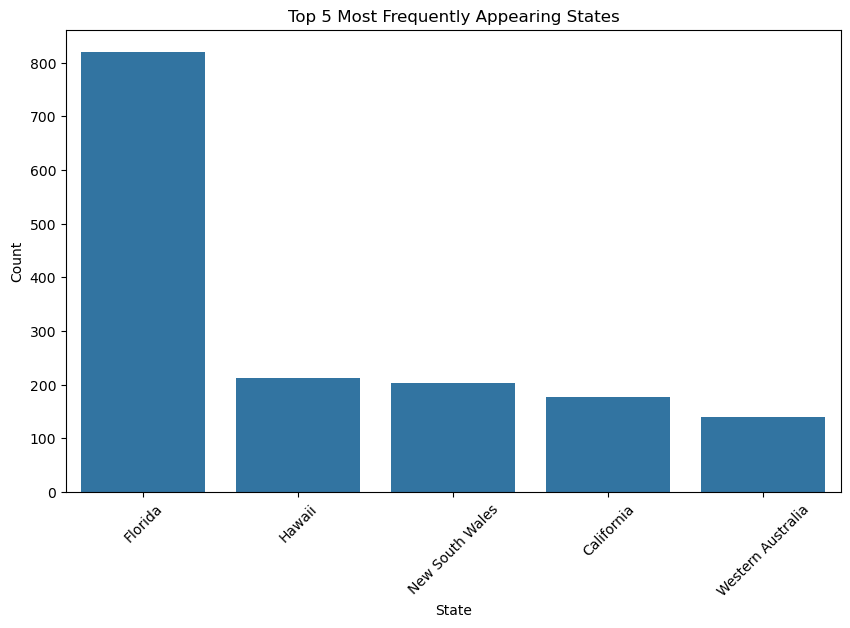

In [121]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so
import pandas as pd

url = r"C:/Users/Carlos/Documents/BootCamp/Data Analyst/Week2/MiniProject02/GSAF5.csv.xlsx"

df = pd.read_excel(url)

df.columns = df.columns.str.strip()

selected_columns = ['Species', 'State', 'Location', 'Date']
df_reduced = df[selected_columns].copy()

df['State'] = df['State'].str.lower().str.replace(' ', '')

df_reduced.loc[:, 'Year'] = pd.to_datetime(df_reduced['Date'], errors='coerce').dt.year
df_reduced = df_reduced[(df_reduced['Year'] >= 1990) & (df_reduced['Year'] <= 2024)]

duplicates_count = df['State'].duplicated().sum()
print(f"There are {duplicates_count} duplicates in the 'State' column after transformation.")

unique_state_counts = df_reduced['State'].value_counts()

top_five_states = unique_state_counts.head(5)

print("Top 5 most frequently appearing states:")
print(top_five_states)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_five_states.index, y=top_five_states.values)

plt.title('Top 5 Most Frequently Appearing States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()